In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load and Preprocess the Data

In [2]:
def load_data(folder_path, img_size=(64, 64)):
    labels = []
    data = []
    label_map = {"daisy": 0, "sunflower": 1}  # Map flower names to numeric labels

    for label in label_map:
        class_path = os.path.join(folder_path, label)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize to uniform size
                data.append(img.flatten())  # Flatten image to 1D array
                labels.append(label_map[label])  # Store the label
    
    return np.array(data), np.array(labels)


#  Load Train and Test Data

In [3]:
train_folder = "/kaggle/input/daisy-vs-sunflower/train_data"
test_folder = "/kaggle/input/daisy-vs-sunflower/test_data"
predict_folder = "/kaggle/input/daisy-vs-sunflower/predict_data"

X_train, y_train = load_data(train_folder)
X_test, y_test = load_data(test_folder)
X_predict, y_predict = load_data(predict_folder)

#Display the shape of the dataset
print("Training Dataset Shape:", X_train.shape, y_train.shape)
print("Testing Dataset Shape:", X_test.shape, y_test.shape)
print("Predicting Dataset Shape:", X_predict.shape, y_predict.shape)

Training Dataset Shape: (402, 12288) (402,)
Testing Dataset Shape: (202, 12288) (202,)
Predicting Dataset Shape: (101, 12288) (101,)


# Normalize the Data

In [4]:
X_train = X_train / 255.0  # Scale pixel values to [0, 1]
X_test = X_test / 255.0


# Train the SVM Model

In [5]:
svm_model = SVC(kernel='linear', C=.001, random_state=42)  # SVM model with linear kernel
svm_model.fit(X_train, y_train)  # Training using the training data


SVC(C=0.001, kernel='linear', random_state=42)

#  Make Predictions

In [6]:
y_test_pred = svm_model.predict(X_test)  # Predict labels for test data
#print("Predicted labels:", y_pred)
y_train_pred = svm_model.predict(X_train)

# Evaluate the Model

In [7]:
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)  # Generate confusion matrix


print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 85.64%
Training Accuracy: 88.56%
Confusion Matrix:
[[91 10]
 [19 82]]


# Visualize the Confusion Matrix

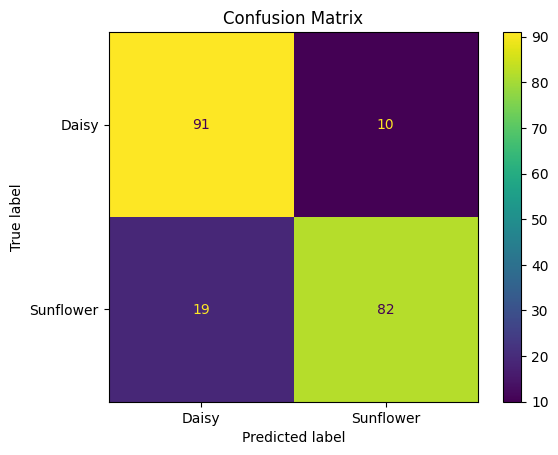

In [8]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Daisy", "Sunflower"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined